<a href="https://colab.research.google.com/github/Akanshajoshiiii/NLP_LAB/blob/main/NLP_LAB2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

cnn layer=weighted sum of input image with some numeric values

In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers,Sequential
from tensorflow.keras.datasets import cifar10

In [3]:
(x_train,y_train),(x_test,y_test)=cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 14s 0us/step


each image is 32x32 and   
**3=no. of channels (RGB)**

In [4]:
x_train.shape

(50000, 32, 32, 3)

Normalise the pixel values

In [5]:
x_train=x_train/255.0
x_test=x_test/255.0



20%validation , 80% training  

x_train.shape → (40000, 32, 32, 3)
x_val.shape   → (10000, 32, 32, 3)

In [6]:
from sklearn.model_selection import train_test_split
x_train,x_val,y_train,y_val=train_test_split(x_train,y_train,test_size=0.2,random_state=42)

**NO RESHAPING FOR CNNs**

(height, width, channels)
→ (32, 32, 3)
This format preserves:

Spatial structure (which pixel is next to which)

Local patterns (edges, corners, textures)

What happens if you reshape?

If you reshape an image like this:

(32, 32, 3) → (3072,)


You convert the image into a 1D vector.

❌ Result:

Pixel neighborhood information is lost

CNN cannot detect edges or shapes

Convolution operation becomes meaningless

In [7]:

# Default padding = 'valid', so spatial size reduces after convolution
# 32×32 → 30×30 → 15×15 → ...
# When BatchNormalization is not used, it’s fine to apply:activation function


model=Sequential(
    [
        keras.Input(shape=(32,32,3)),
        #filter size of 3x3 to detect low level features like edges and corners
        #relu adds non linearity

        # 32 filters and 3x3 kernel size

        layers.Conv2D(32,3,activation='relu'),

# Reduces spatial size by taking maximum value in each region.
# Helps reduce computation and overfitting.
        layers.MaxPooling2D(),


        layers.Conv2D(64,3,activation='relu'),
        layers.MaxPooling2D(),

        layers.Conv2D(128,3,activation='relu'),
        layers.MaxPooling2D(),

        # Dense layer ko input chahiye hota hai 1D vector
        # output = W × input + b
        # it does matrix multiplication so it needs input of 1d vector

        layers.Flatten(),

        #hidden layer
        layers.Dense(64,activation='relu'),
        #output m 10 as 10 labels due to cifer10
        layers.Dense(10,activation='softmax')
    ]
)

(3x3)x3x32+32=896  

15-0-3(kernal)+1=13
3*3

In [7]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 4, 4, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 2, 2, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        32,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 126,730 (495.04 KB)

 Trainable params: 126,730 (495.04 KB)

 Non-trainable params: 0 (0.00 B)

In [8]:
model.compile(optimizer=keras.optimizers.Adam(),
              loss=keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [9]:
model.fit(x_train,y_train,batch_size=64,verbose=1,epochs=10,validation_data=(x_val,y_val))


Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.2938 - loss: 1.9012 - val_accuracy: 0.4839 - val_loss: 1.3951
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.5114 - loss: 1.3539 - val_accuracy: 0.5704 - val_loss: 1.2010
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.5767 - loss: 1.1795 - val_accuracy: 0.6010 - val_loss: 1.1234
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.6201 - loss: 1.0663 - val_accuracy: 0.6350 - val_loss: 1.0329
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.6557 - loss: 0.9830 - val_accuracy: 0.6415 - val_loss: 1.0291
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.6795 - loss: 0.9069 - val_accuracy: 0.6678 - val_loss: 0.9522
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7044 - loss: 0.8496 - val_accuracy: 0.6784 - val_loss: 0.9292
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7239 - loss: 0.7944 - val_accuracy: 0

**Conv → BatchNorm → ReLU → Pool**

32 → number of filters (kernels)
**bold text**
The layer uses 32 different filters

Each filter learns a different feature

edges

corners

color patterns

Output will have 32 feature maps

📌 More filters ⇒ more feature types learned

In [22]:
input=keras.Input(shape=(32,32,3))


# Block 1

# no activation  in convo2D layer apply coz merko batch normalisation lgana
x=layers.Conv2D(32,3)(input)
x=layers.BatchNormalization()(x)
#activation after bn
x=keras.activations.relu(x) #x=pichli layer ki output
x=layers.MaxPooling2D()(x)



#block 2 64 filters 3x3 kernel size
x=layers.Conv2D(64,3)(x)
x=layers.BatchNormalization()(x)
x=keras.activations.relu(x)
x=layers.MaxPooling2D()(x)

#block 3
x=layers.Conv2D(128,3)(x)
x=layers.BatchNormalization()(x)
x=keras.activations.relu(x)
x=layers.MaxPooling2D()(x)

x=layers.Flatten()(x)
x=layers.Dense(64,activation='relu')(x)
output=layers.Dense(10,activation='softmax')(x)
model1=keras.Model(inputs=input,outputs=output)

In [23]:
model1.compile(optimizer=keras.optimizers.Adam(),
              loss=keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])


In [24]:
model1.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 30, 30, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 13, 13, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 4, 4, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 4, 4, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 2, 2, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 64)             │        32,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 127,626 (498.54 KB)

 Trainable params: 127,178 (496.79 KB)

 Non-trainable params: 448 (1.75 KB)


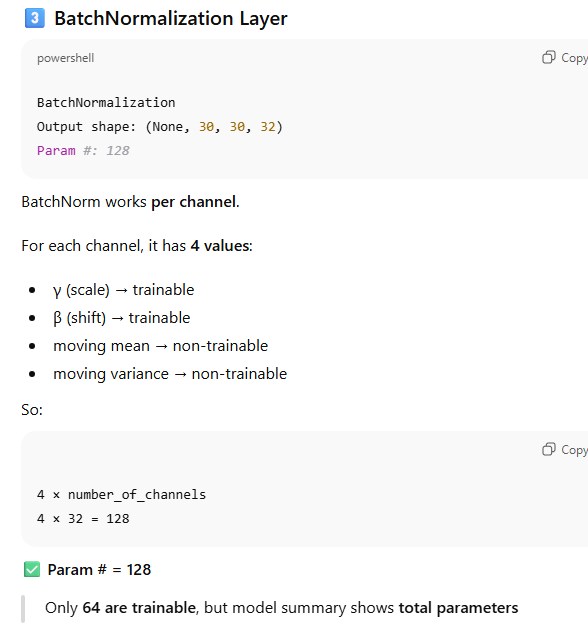

In [25]:
model1.fit(x_train,y_train,batch_size=64,verbose=1,epochs=10,validation_data=(x_val,y_val))

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.4287 - loss: 1.6171 - val_accuracy: 0.5833 - val_loss: 1.1809
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.6282 - loss: 1.0701 - val_accuracy: 0.5669 - val_loss: 1.2582
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.6826 - loss: 0.9135 - val_accuracy: 0.5531 - val_loss: 1.3425
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7246 - loss: 0.8056 - val_accuracy: 0.6487 - val_loss: 1.0322
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.7529 - loss: 0.7258 - val_accuracy: 0.6661 - val_loss: 1.0037
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.7772 - loss: 0.6457 - val_accuracy: 0.6015 - val_loss: 1.2594
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8020 - loss: 0.5823 - val_accuracy: 0.6185 - val_loss: 1.2380
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8169 - loss: 0.5292 - val_accuracy: 0.

In [9]:


# Model Subclassing
class CNNBlock(layers.Layer):
    def __init__(self, num_filters, kernel_size=3):
        super(CNNBlock, self).__init__()
        self.conv = layers.Conv2D(num_filters, kernel_size)
        self.norm = layers.BatchNormalization()
        self.pool = layers.MaxPooling2D()

    def call(self, inputs):
        x = self.conv(inputs)
        x = self.norm(x)
        x = keras.activations.relu(x)
        x = self.pool(x)
        return x


In [10]:
model3=Sequential(
    [

        CNNBlock(32),
        CNNBlock(64),
        CNNBlock(128),
        #layers.Flatten()Converts 3D feature maps → 1D vector Required before Dense layers
        layers.Flatten(),
        #deep nn iske output p lgana h
        layers.Dense(64,activation='relu'),
        layers.Dense(10,activation='softmax'),
    ]
)





In [11]:
model3.compile(optimizer=keras.optimizers.Adam(),
              loss=keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])


In [12]:
model3.fit(x_train,y_train,batch_size=64,verbose=1,epochs=10,validation_data=(x_val,y_val))

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.4361 - loss: 1.5876 - val_accuracy: 0.4921 - val_loss: 1.4333
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.6587 - loss: 0.9759 - val_accuracy: 0.5008 - val_loss: 1.5410
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.7157 - loss: 0.8168 - val_accuracy: 0.5679 - val_loss: 1.2981
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.7574 - loss: 0.6941 - val_accuracy: 0.6548 - val_loss: 1.0748
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.7909 - loss: 0.5945 - val_accuracy: 0.6741 - val_loss: 0.9663
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8167 - loss: 0.5240 - val_accuracy: 0.6767 - val_loss: 0.9899
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8452 - loss: 0.4531 - val_accuracy: 0.6924 - val_loss: 0.9917
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8618 - loss: 0.3981 - val_accuracy: 0

In [13]:
model3.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ cnn_block (CNNBlock)            │ (64, 15, 15, 32)       │         1,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ cnn_block_1 (CNNBlock)          │ (64, 6, 6, 64)         │        18,752 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ cnn_block_2 (CNNBlock)          │ (64, 2, 2, 128)        │        74,368 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (64, 512)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (64, 64)               │        32,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (64, 10)               │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 381,984 (1.46 MB)

 Trainable params: 127,178 (496.79 KB)

 Non-trainable params: 448 (1.75 KB)

 Optimizer params: 254,358 (993.59 KB)